In [100]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np

In [33]:
train_data_df = pd.read_csv("../data/preprocessed/prp_combined_Y1.csv")
test_data_df = pd.read_csv("../data/preprocessed/prp_combined_Y2.csv")

In [34]:
train_data_df.columns

Index(['MemberID', 'Specialty', 'PlaceSvc', 'DSFS_Claims',
       'PrimaryConditionGroup', 'ProcedureGroup', 'SupLOS', 'PayDelay',
       'LengthOfStay', 'CharlsonIndex', 'AgeAtFirstClaim', 'Sex', 'DSFS_Drugs',
       'DrugCount', 'DSFS_Lab', 'LabCount', 'ClaimsTruncated',
       'DaysInHospitalY2'],
      dtype='object')

In [35]:
demographic_features = ['Specialty', 'PlaceSvc', 'AgeAtFirstClaim', 'Sex']
medical_history_features = ['DSFS_Claims', 'CharlsonIndex', 'PrimaryConditionGroup', 'ProcedureGroup', 'SupLOS', 
                            'PayDelay', 'LengthOfStay', 'DSFS_Drugs', 'DSFS_Lab', 'LabCount', 'ClaimsTruncated']
treatment_features = ['DrugCount', 'LabCount', 'DSFS_Drugs', 'DSFS_Lab']


In [102]:
n_samples, n_features = (train_data_df.drop(["MemberID", "DaysInHospitalY2"], axis=1)).shape

In [103]:
y_train = train_data_df["DaysInHospitalY2"]
y_test = test_data_df["DaysInHospitalY3"]

In [104]:
train_data_df

,MemberID,Specialty,PlaceSvc,DSFS_Claims,PrimaryConditionGroup,ProcedureGroup,SupLOS,PayDelay,LengthOfStay,CharlsonIndex,AgeAtFirstClaim,Sex,DSFS_Drugs,DrugCount,DSFS_Lab,LabCount,ClaimsTruncated,DaysInHospitalY2
0,210,1,0,1.0,1,0,0.0,90.000000,0.250000,0.000000,35.0,0.5,3.333333,5.0,2.000000,2.0,0,0
1,3197,0,0,12.0,4,1,0.2,98.400000,0.000000,0.000000,5.0,1.0,7.750000,5.0,12.000000,0.0,0,0
2,3889,1,1,1.0,2,1,0.0,70.692308,0.230769,0.615385,45.0,1.0,6.000000,30.0,1.000000,10.0,0,0
3,4187,1,0,1.0,2,1,0.0,85.000000,0.000000,0.000000,55.0,1.0,5.500000,61.0,12.000000,0.0,0,0
4,9063,1,0,1.0,2,1,0.0,60.250000,0.000000,0.000000,65.0,1.0,1.500000,2.0,12.000000,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75991,99995554,1,0,7.0,2,0,0.0,111.400000,0.000000,0.000000,45.0,0.0,7.500000,8.0,6.333333,11.0,1,0
75992,99996214,0,0,1.0,2,1,0.0,19.000000,0.000000,0.000000,45.0,0.0,12.000000,0.0,12.000000,0.0,0,0
75993,99997485,0,0,1.0,1,1,0.0,130.000000,0.000000,0.000000,15.0,0.0,12.000000,0.0,12.000000,0.0,0,0
75994,99997895,0,0,9.0,2,1,0.0,38.500000,0.000000,0.000000,45.0,0.0,12.000000,0.0,6.500000,10.0,0,0


In [105]:
train_data = torch.tensor(((train_data_df.drop(["MemberID", "DaysInHospitalY2"], axis=1)).values).astype(np.float32))
test_data = torch.tensor(((test_data_df.drop(["MemberID", "DaysInHospitalY3"], axis=1)).values).astype(np.float32))
train_label = torch.tensor(y_train.astype(np.float32))
test_label = torch.tensor(y_test.astype(np.float32))

In [130]:
y_train = train_label.type(torch.LongTensor)
y_test = test_label.type(torch.LongTensor)

In [107]:
train_data

tensor([[ 1.0000,  0.0000,  1.0000,  ...,  2.0000,  2.0000,  0.0000],
        [ 0.0000,  0.0000, 12.0000,  ..., 12.0000,  0.0000,  0.0000],
        [ 1.0000,  1.0000,  1.0000,  ...,  1.0000, 10.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  1.0000,  ..., 12.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  9.0000,  ...,  6.5000, 10.0000,  0.0000],
        [ 1.0000,  0.0000,  1.0000,  ...,  1.0000,  5.0000,  0.0000]])

In [31]:
len(train_data)

75996

In [108]:
n_classes = len(y_train.unique())
n_epochs = 10

In [109]:
n_classes

16

In [110]:
train_data

tensor([[ 1.0000,  0.0000,  1.0000,  ...,  2.0000,  2.0000,  0.0000],
        [ 0.0000,  0.0000, 12.0000,  ..., 12.0000,  0.0000,  0.0000],
        [ 1.0000,  1.0000,  1.0000,  ...,  1.0000, 10.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  1.0000,  ..., 12.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  9.0000,  ...,  6.5000, 10.0000,  0.0000],
        [ 1.0000,  0.0000,  1.0000,  ...,  1.0000,  5.0000,  0.0000]])

In [119]:
# Create model
# f = wx + b, sigmoid at the end
class LogisticRegression(nn.Module):

    def __init__(self, n_input_features, n_outputs):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, n_outputs)

    def forward(self, x):
        y_predicted = (torch.sigmoid(self.linear(x)))
        return y_predicted
    
model = LogisticRegression(n_features, n_classes)

In [120]:
# Loss and optimizer
learning_rate = 0.01
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [121]:
LOG_INTERVAL = 250
running_loss, running_accuracy = list(), list()

In [122]:
print(train_data.dtype)
print()

torch.float32



In [123]:
y_train = train_label.type(torch.LongTensor)
y_test = test_label.type(torch.LongTensor)

In [135]:
# training loop
num_epochs = 10000

for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(train_data)
    loss = criterion(y_predicted, y_train)
    
    # backward pass
    loss.backward()
    
    # updates
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 2.0291
epoch: 20, loss = 2.0291
epoch: 30, loss = 2.0291
epoch: 40, loss = 2.0291
epoch: 50, loss = 2.0291
epoch: 60, loss = 2.0291
epoch: 70, loss = 2.0291
epoch: 80, loss = 2.0291
epoch: 90, loss = 2.0291
epoch: 100, loss = 2.0291
epoch: 110, loss = 2.0291
epoch: 120, loss = 2.0291
epoch: 130, loss = 2.0291
epoch: 140, loss = 2.0291
epoch: 150, loss = 2.0291
epoch: 160, loss = 2.0291
epoch: 170, loss = 2.0291
epoch: 180, loss = 2.0291
epoch: 190, loss = 2.0291
epoch: 200, loss = 2.0291
epoch: 210, loss = 2.0291
epoch: 220, loss = 2.0291
epoch: 230, loss = 2.0291
epoch: 240, loss = 2.0291
epoch: 250, loss = 2.0291
epoch: 260, loss = 2.0291
epoch: 270, loss = 2.0291
epoch: 280, loss = 2.0291
epoch: 290, loss = 2.0291
epoch: 300, loss = 2.0291
epoch: 310, loss = 2.0291
epoch: 320, loss = 2.0291
epoch: 330, loss = 2.0291
epoch: 340, loss = 2.0291
epoch: 350, loss = 2.0291
epoch: 360, loss = 2.0290
epoch: 370, loss = 2.0290
epoch: 380, loss = 2.0290
epoch: 390, loss = 2.

In [126]:
y_test

tensor([0, 0, 0,  ..., 0, 0, 0])

In [127]:
y_predicted = model(test_data)  # no need to call model.forward()
y_predicted_cls = y_predicted.round() 

In [128]:
y_test = y_test.view(y_test.shape[0], 1)

In [131]:
len(y_predicted_cls)

71400

In [132]:
y_predicted_cls.eq(y_test).sum()

RuntimeError: The size of tensor a (16) must match the size of tensor b (71400) at non-singleton dimension 1

In [91]:
y_predicted_cls.eq(y_test).sum().item() 

784897

In [92]:
test_data_df.shape

(71400, 18)

In [90]:
y_test.size(0)

71400

In [136]:
with torch.no_grad():  # No need to track gradients during inference
    model.eval()  # Set the model to evaluation mode
    y_predicted_logits = model(test_data)  # Get raw logits
    y_predicted = torch.argmax(y_predicted_logits, dim=1)  # Get predicted class by finding the max logit

    # Calculate accuracy
    correct_predictions = (y_predicted == y_test).sum().item()  # Count correct predictions
    total_samples = y_test.size(0)  # Total number of samples
    accuracy = correct_predictions / total_samples  # Accuracy calculation

    print(f'Accuracy = {accuracy * 100:.2f}%')

Accuracy = 84.98%


In [89]:
with torch.no_grad():
    y_predicted = model(test_data)  # Predict using the model
    y_predicted_cls = y_predicted.round()  # Convert probabilities to class labels (round to nearest class)
    
    correct_predictions = y_predicted_cls.eq(y_test).sum().item()  # Count of correct predictions
    total_samples = y_test.size(0)  # Total number of samples in the test set
    
    acc = correct_predictions / total_samples  # Accuracy calculation
    print(f'Accuracy = {acc:.4f}')


Accuracy = 10.9930


In [87]:
with torch.no_grad():
    y_predicted = model(test_data)  # no need to call model.forward()
    y_predicted_cls = y_predicted.round()   # round off to nearest class
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])  # accuracy
    print(f'accuracy = {acc:.4f}')

accuracy = 10.9930


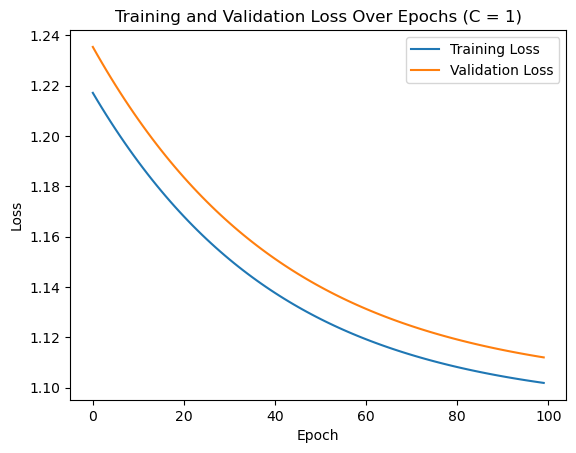

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Logistic Regression Model for Multiclass
class MulticlassLogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MulticlassLogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.linear(x)  # raw logits, apply softmax during evaluation

# Cross-Validation Function for Multiclass with tracking of loss and performance metrics for each epoch
def cross_validate_multiclass_with_loss(X, y, model_class, num_folds, num_classes, param_grid, num_epochs=100, lr=0.01):
    fold_size = len(X) // num_folds
    results = {}

    for C in param_grid:  # Test different regularization parameters
        fold_train_losses = []
        fold_val_losses = []
        fold_accuracies = []
        fold_precisions = []
        fold_recalls = []
        fold_f1s = []
        epoch_metrics = {'train_loss': [], 'val_loss': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': []}  # Store metrics and loss for each epoch

        for fold in range(num_folds):
            # Create validation set for this fold
            val_start = fold * fold_size
            val_end = (fold + 1) * fold_size if (fold + 1) * fold_size <= len(X) else len(X)
            X_val = X[val_start:val_end]
            y_val = y[val_start:val_end]

            # Create training set for this fold
            X_train = torch.cat([X[:val_start], X[val_end:]], dim=0)
            y_train = torch.cat([y[:val_start], y[val_end:]], dim=0)

            # Initialize model
            model = model_class(X.shape[1], num_classes)
            
            # Define optimizer and loss function
            optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=C)  # Regularization with C
            criterion = nn.CrossEntropyLoss()  # Multiclass classification loss

            # Train the model and track performance and loss after each epoch
            for epoch in range(num_epochs):
                model.train()
                optimizer.zero_grad()
                outputs = model(X_train)
                train_loss = criterion(outputs, y_train)
                train_loss.backward()
                optimizer.step()

                # Store training loss for this epoch
                if len(epoch_metrics['train_loss']) <= epoch:
                    epoch_metrics['train_loss'].append([])
                epoch_metrics['train_loss'][epoch].append(train_loss.item())

                # Evaluate on validation set after each epoch
                model.eval()
                with torch.no_grad():
                    val_logits = model(X_val)
                    val_loss = criterion(val_logits, y_val)
                    _, val_preds = torch.max(val_logits, 1)  # Get class predictions
                    
                    # Store validation loss for this epoch
                    if len(epoch_metrics['val_loss']) <= epoch:
                        epoch_metrics['val_loss'].append([])
                    epoch_metrics['val_loss'][epoch].append(val_loss.item())
                    
                    # Accuracy, Precision, Recall, F1
                    acc = accuracy_score_multiclass(y_val, val_preds)
                    precision, recall, f1 = precision_recall_f1_multiclass(y_val, val_preds, num_classes)
                    
                    # Track metrics for each epoch
                    if len(epoch_metrics['accuracy']) <= epoch:
                        epoch_metrics['accuracy'].append([])
                        epoch_metrics['precision'].append([])
                        epoch_metrics['recall'].append([])
                        epoch_metrics['f1'].append([])
                    
                    epoch_metrics['accuracy'][epoch].append(acc)
                    epoch_metrics['precision'][epoch].append(precision)
                    epoch_metrics['recall'][epoch].append(recall)
                    epoch_metrics['f1'][epoch].append(f1)

        # Store average metrics and loss for each epoch across folds
        results[C] = {
            'train_loss': [np.mean(losses) for losses in epoch_metrics['train_loss']],
            'val_loss': [np.mean(losses) for losses in epoch_metrics['val_loss']],
            'accuracy': [np.mean(metrics) for metrics in epoch_metrics['accuracy']],
            'precision': [np.mean(metrics) for metrics in epoch_metrics['precision']],
            'recall': [np.mean(metrics) for metrics in epoch_metrics['recall']],
            'f1': [np.mean(metrics) for metrics in epoch_metrics['f1']],
        }

    return results

# Manual accuracy calculation for multiclass
def accuracy_score_multiclass(y_true, y_pred):
    correct = (y_true == y_pred).sum().item()
    total = y_true.shape[0]
    return correct / total

# Manual precision, recall, and F1-score calculation for multiclass
def precision_recall_f1_multiclass(y_true, y_pred, num_classes):
    precisions = []
    recalls = []
    f1s = []

    for class_label in range(num_classes):
        TP = ((y_pred == class_label) & (y_true == class_label)).sum().item()
        FP = ((y_pred == class_label) & (y_true != class_label)).sum().item()
        FN = ((y_pred != class_label) & (y_true == class_label)).sum().item()

        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1_score)

    # Calculate macro-averaged precision, recall, and F1-score
    macro_precision = np.mean(precisions)
    macro_recall = np.mean(recalls)
    macro_f1 = np.mean(f1s)
    
    return macro_precision, macro_recall, macro_f1

# Example Usage (Multiclass Logistic Regression)
# Assuming X is your input tensor and y is your target tensor (multiclass)
X = torch.randn(1000, 10)  # 1000 samples, 10 features
y = torch.randint(0, 3, (1000,))  # Multiclass target (3 classes)

# Cross-validation parameters
num_folds = 5
param_grid = [0.01, 0.1, 1, 10, 100]  # Regularization parameter grid
num_classes = 3  # Number of classes in the classification problem

# Perform cross-validation for logistic regression with multiclass and loss tracking
results = cross_validate_multiclass_with_loss(X, y, MulticlassLogisticRegression, num_folds, num_classes, param_grid)

# Plot loss over epochs for a given regularization parameter
def plot_loss_over_epochs(results, C_value):
    epochs = len(results[C_value]['train_loss'])
    epochs_range = range(epochs)

    plt.plot(epochs_range, results[C_value]['train_loss'], label="Training Loss")
    plt.plot(epochs_range, results[C_value]['val_loss'], label="Validation Loss")
    
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Training and Validation Loss Over Epochs (C = {C_value})")
    plt.legend(loc="upper right")
    plt.show()

# Example plotting for C = 1
plot_loss_over_epochs(results, C_value=1)


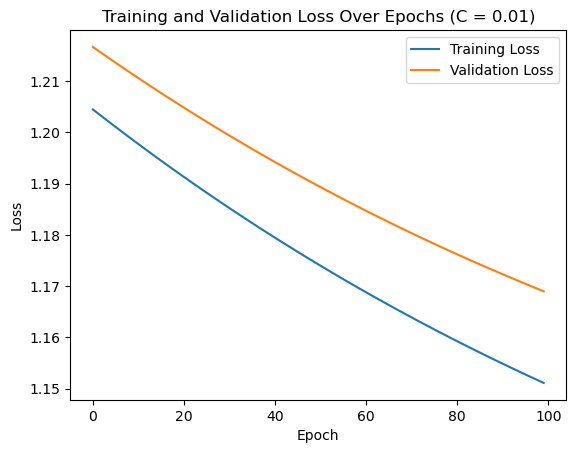

In [2]:
plot_loss_over_epochs(results, C_value=0.01)

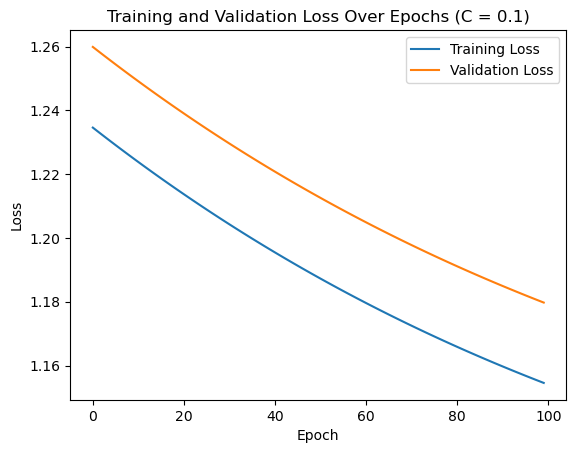

In [3]:
plot_loss_over_epochs(results, C_value=0.1)


Fold 1/5
Epoch 10/100, Loss: 1.9786, Val Loss: 2.1315, Val Accuracy: 0.5386
Epoch 20/100, Loss: 2.4548, Val Loss: 4.1516, Val Accuracy: 0.8458
Epoch 30/100, Loss: 8.5287, Val Loss: 6.5067, Val Accuracy: 0.8460
Epoch 40/100, Loss: 7.0325, Val Loss: 5.1062, Val Accuracy: 0.8432
Epoch 50/100, Loss: 1.7379, Val Loss: 3.5484, Val Accuracy: 0.1102
Epoch 60/100, Loss: 3.5081, Val Loss: 6.7865, Val Accuracy: 0.8461
Epoch 70/100, Loss: 2.3225, Val Loss: 5.7173, Val Accuracy: 0.8461
Epoch 80/100, Loss: 3.0366, Val Loss: 4.4629, Val Accuracy: 0.1903
Epoch 90/100, Loss: 10.5858, Val Loss: 8.5950, Val Accuracy: 0.8461
Epoch 100/100, Loss: 3.9327, Val Loss: 2.0348, Val Accuracy: 0.8427

Fold 2/5
Epoch 10/100, Loss: 4.4244, Val Loss: 2.6938, Val Accuracy: 0.8329
Epoch 20/100, Loss: 6.6329, Val Loss: 4.9061, Val Accuracy: 0.8425
Epoch 30/100, Loss: 4.5177, Val Loss: 2.7399, Val Accuracy: 0.8410
Epoch 40/100, Loss: 8.1379, Val Loss: 6.4628, Val Accuracy: 0.8416
Epoch 50/100, Loss: 7.4700, Val Loss: 5.

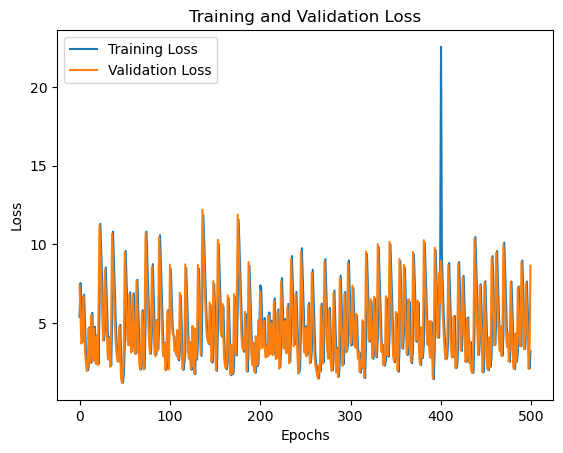

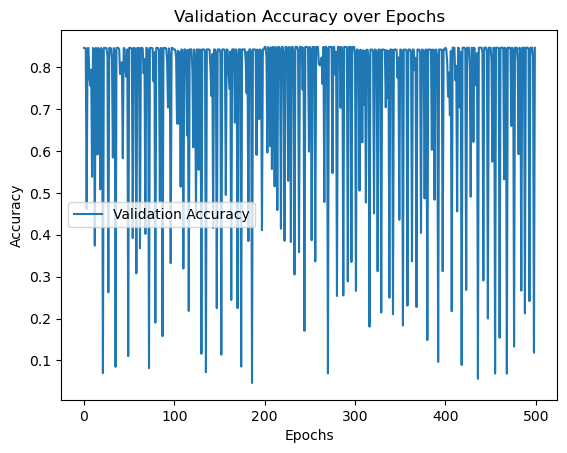

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold


In [46]:

# Load the data
train_data_df = pd.read_csv("../data/preprocessed/prp_combined_Y1.csv")
test_data_df = pd.read_csv("../data/preprocessed/prp_combined_Y2.csv")

# Prepare the data for training
X_train = torch.tensor((train_data_df.drop(["MemberID", "DaysInHospitalY2"], axis=1).values).astype(np.float32))
X_test = torch.tensor((test_data_df.drop(["MemberID", "DaysInHospitalY3"], axis=1).values).astype(np.float32))

# Extract the subsets of features
X_train_demographic = train_data_df[demographic_features]
X_train_medical_history = train_data_df[medical_history_features]
X_train_treatment = train_data_df[treatment_features]


# Convert to torch tensors
X_train_demographic = torch.tensor(X_train_demographic.values, dtype=torch.float32)
X_train_medical_history = torch.tensor(X_train_medical_history.values, dtype=torch.float32)
X_train_treatment = torch.tensor(X_train_treatment.values, dtype=torch.float32)




y_train = torch.tensor(train_data_df["DaysInHospitalY2"].values.astype(np.longlong))
y_test = torch.tensor(test_data_df["DaysInHospitalY3"].values.astype(np.longlong))

# Get the number of features and classes
n_samples, n_features = X_train.shape
n_classes = len(torch.unique(y_train))


In [41]:

# Define Logistic Regression model (multiclass)
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features, n_outputs):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, n_outputs)

    def forward(self, x):
        return self.linear(x)  # raw logits, softmax will be applied in loss function


In [ ]:

# Training and validation function
def train_and_validate(X_train, y_train, model, criterion, optimizer, num_epochs=100, num_folds=5, lr=0.01):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    
    # Store losses and metrics for plotting
    train_losses = []
    val_losses = []
    val_accuracies = []
    
    # Cross-validation
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
        print(f"\nFold {fold + 1}/{num_folds}")
        train_data, val_data = X_train[train_idx], X_train[val_idx]
        train_labels, val_labels = y_train[train_idx], y_train[val_idx]

        # Initialize model and optimizer
        model = LogisticRegression(n_features, n_classes)
        optimizer = optim.SGD(model.parameters(), lr=lr)
        
        for epoch in range(num_epochs):
            model.train()
            
            # Forward pass
            y_pred = model(train_data)
            loss = criterion(y_pred, train_labels)
            train_losses.append(loss.item())

            # Backward pass
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            # Validation after each epoch
            model.eval()
            with torch.no_grad():
                val_preds = model(val_data)
                val_loss = criterion(val_preds, val_labels)
                val_losses.append(val_loss.item())

                # Compute accuracy
                _, predicted = torch.max(val_preds, 1)
                accuracy = (predicted == val_labels).float().mean().item()
                val_accuracies.append(accuracy)

            # Print loss for every 10 epochs
            if (epoch + 1) % 10 == 0:
                print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Val Accuracy: {accuracy:.4f}')
    
    return train_losses, val_losses, val_accuracies

# Loss function and optimizer
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()

# Train the model using cross-validation and track losses
train_losses, val_losses, val_accuracies = train_and_validate(X_train, y_train, LogisticRegression, criterion, None, num_epochs=100)

# Plot training and validation loss
def plot_loss(train_losses, val_losses):
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.show()

# Plot training and validation loss
plot_loss(train_losses, val_losses)

# Plot validation accuracy
def plot_accuracy(val_accuracies):
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Validation Accuracy over Epochs")
    plt.legend()
    plt.show()

plot_accuracy(val_accuracies)


In [ ]:
def kfold_indices(data, k):
    fold_size = len(data) // k
    indices = np.arange(len(data))
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds

# Define the number of folds (K)
k = 20

# Get the fold indices
fold_indices = kfold_indices(X_train, k)

In [14]:
kf = kfold_indices(X_train, k)

In [24]:
for i, j in enumerate(kf):
    print(j[0])

[ 3799  3800  3801 ... 75993 75994 75995]
[    0     1     2 ... 75993 75994 75995]
[    0     1     2 ... 75993 75994 75995]
[    0     1     2 ... 75993 75994 75995]
[    0     1     2 ... 75993 75994 75995]
[    0     1     2 ... 75993 75994 75995]
[    0     1     2 ... 75993 75994 75995]
[    0     1     2 ... 75993 75994 75995]
[    0     1     2 ... 75993 75994 75995]
[    0     1     2 ... 75993 75994 75995]
[    0     1     2 ... 75993 75994 75995]
[    0     1     2 ... 75993 75994 75995]
[    0     1     2 ... 75993 75994 75995]
[    0     1     2 ... 75993 75994 75995]
[    0     1     2 ... 75993 75994 75995]
[    0     1     2 ... 75993 75994 75995]
[    0     1     2 ... 75993 75994 75995]
[    0     1     2 ... 75993 75994 75995]
[    0     1     2 ... 75993 75994 75995]
[    0     1     2 ... 75993 75994 75995]


In [44]:
# Training and validation function with different regularization parameters
def train_and_validate_with_regularization(X_train, y_train, model_class, criterion, num_epochs=100, num_folds=20, lr=0.01, regularization_params=[0.01, 0.1, 1, 10]):
    # kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    kf = kfold_indices(X_train, num_folds)
    
    results = {}

    # Iterate over different regularization parameters (weight decay values)
    for reg_param in regularization_params:
        print(f"\nTraining with Regularization Parameter (Weight Decay): {reg_param}")

        # Store losses and metrics for plotting
        train_losses = []
        val_losses = []
        val_accuracies = []
        
        # Cross-validation
        for fold, split in enumerate(kf):
            train_idx = split[0]
            val_idx = split[1]
            print(f"\nFold {fold + 1}/{num_folds}")
            train_data, val_data = X_train[train_idx], X_train[val_idx]
            train_labels, val_labels = y_train[train_idx], y_train[val_idx]

            # Initialize model and optimizer
            model = LogisticRegression(n_features, n_classes)
            optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=reg_param)  # Apply regularization via weight decay
            
            for epoch in range(num_epochs):
                model.train()
                
                # Forward pass
                y_pred = model(train_data)
                loss = criterion(y_pred, train_labels)
                train_losses.append(loss.item())

                # Backward pass
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()

                # Validation after each epoch
                model.eval()
                with torch.no_grad():
                    val_preds = model(val_data)
                    val_loss = criterion(val_preds, val_labels)
                    val_losses.append(val_loss.item())

                    # Compute accuracy
                    _, predicted = torch.max(val_preds, 1)
                    accuracy = (predicted == val_labels).float().mean().item()
                    val_accuracies.append(accuracy)

                # Print loss for every 10 epochs
                if (epoch + 1) % 10 == 0:
                    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Val Accuracy: {accuracy:.4f}')
        
        # Store results for the current regularization parameter
        results[reg_param] = {
            'train_loss': train_losses,
            'val_loss': val_losses,
            'val_accuracy': val_accuracies
        }

    return results

# Loss function and optimizer
learning_rate = 0.1
criterion = nn.CrossEntropyLoss()

# Regularization parameters to test (C = 1 / weight_decay)
regularization_params = [0.01, 0.1, 1, 10]  # Larger values mean stronger regularization

# Train the model using cross-validation and different regularization parameters
results = train_and_validate_with_regularization(X_train_demographic, y_train, LogisticRegression, criterion, num_epochs=100, regularization_params=regularization_params)

# Plot loss and accuracy over epochs for a given regularization parameter
def plot_loss_and_accuracy(results, reg_param):
    epochs = len(results[reg_param]['train_loss'])
    epochs_range = range(epochs)

    # Plot training and validation loss
    plt.plot(epochs_range, results[reg_param]['train_loss'], label='Training Loss')
    plt.plot(epochs_range, results[reg_param]['val_loss'], label='Validation Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Training and Validation Loss (Regularization: {reg_param})")
    plt.legend()
    plt.show()

    # Plot validation accuracy
    plt.plot(epochs_range, results[reg_param]['val_accuracy'], label='Validation Accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title(f"Validation Accuracy over Epochs (Regularization: {reg_param})")
    plt.legend()
    plt.show()

# Example plotting for regularization parameter = 1
plot_loss_and_accuracy(results, reg_param=1)


Training with Regularization Parameter (Weight Decay): 0.01

Fold 1/20


KeyError: "None of [Int64Index([ 3799,  3800,  3801,  3802,  3803,  3804,  3805,  3806,  3807,\n             3808,\n            ...\n            75986, 75987, 75988, 75989, 75990, 75991, 75992, 75993, 75994,\n            75995],\n           dtype='int64', length=72197)] are in the [columns]"

In [45]:
X_train_demographic

,Specialty,PlaceSvc,AgeAtFirstClaim,Sex
0,1,0,35.0,0.5
1,0,0,5.0,1.0
2,1,1,45.0,1.0
3,1,0,55.0,1.0
4,1,0,65.0,1.0
...,...,...,...,...
75991,1,0,45.0,0.0
75992,0,0,45.0,0.0
75993,0,0,15.0,0.0
75994,0,0,45.0,0.0


In [48]:
y_train

tensor([0, 0, 0,  ..., 0, 0, 0])

In [51]:
X_train_medical_history.size()[1]

11

In [53]:
# Training and validation function with different regularization parameters
def train_and_validate_with_regularization(X_train, y_train, model_class, criterion, num_epochs=100, num_folds=20, lr=0.01, regularization_params=[0.01, 0.1, 1, 10]):
    kf = kfold_indices(X_train, num_folds)
    
    results = {}

    n_features = X_train.size()[1]
    # Iterate over different regularization parameters (weight decay values)
    for reg_param in regularization_params:
        print(f"\nTraining with Regularization Parameter (Weight Decay): {reg_param}")

        # Store the final loss and accuracy at the end of each fold
        fold_losses = []
        fold_accuracies = []
        
        # Cross-validation
        for fold, split in enumerate(kf):
            train_idx = split[0]
            val_idx = split[1]
            print(f"\nFold {fold + 1}/{num_folds}")
            train_data, val_data = X_train[train_idx], X_train[val_idx]
            train_labels, val_labels = y_train[train_idx], y_train[val_idx]

            # Initialize model and optimizer
            model = LogisticRegression(n_features, n_classes)
            optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=reg_param)  # Apply regularization via weight decay
            
            for epoch in range(num_epochs):
                model.train()
                # Forward pass
                y_pred = model(train_data)
                loss = criterion(y_pred, train_labels)

                # Backward pass
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()

            # After completing all epochs, evaluate the model on the validation set
            model.eval()
            with torch.no_grad():
                val_preds = model(val_data)
                val_loss = criterion(val_preds, val_labels)

                # Compute accuracy
                _, predicted = torch.max(val_preds, 1)
                accuracy = (predicted == val_labels).float().mean().item()

            # Store the final loss and accuracy for this fold
            fold_losses.append(val_loss.item())
            fold_accuracies.append(accuracy)

            # Print the loss and accuracy for this fold
            print(f'Fold {fold + 1}, Final Loss: {val_loss.item():.4f}, Final Accuracy: {accuracy:.4f}')
        
        # Store results for the current regularization parameter
        results[reg_param] = {
            'fold_losses': fold_losses,
            'fold_accuracies': fold_accuracies
        }

    return results

# Loss function
criterion = nn.CrossEntropyLoss()

# Regularization parameters to test (C = 1 / weight_decay)
regularization_params = [0.01, 0.1, 1, 10]  # Larger values mean stronger regularization

# Perform cross-validation for different regularization parameters
results = train_and_validate_with_regularization(X_train_demographic, y_train, LogisticRegression, criterion, num_epochs=100, num_folds=20, regularization_params=regularization_params)

# Print results for each regularization parameter
for reg_param in regularization_params:
    print(f"\nResults for Regularization Parameter (Weight Decay): {reg_param}")
    fold_losses = results[reg_param]['fold_losses']
    fold_accuracies = results[reg_param]['fold_accuracies']
    
    for fold_idx in range(len(fold_losses)):
        print(f"Fold {fold_idx + 1}: Loss = {fold_losses[fold_idx]:.4f}, Accuracy = {fold_accuracies[fold_idx]:.4f}")


Training with Regularization Parameter (Weight Decay): 0.01

Fold 1/20
Fold 1, Final Loss: 1.3884, Final Accuracy: 0.7947

Fold 2/20
Fold 2, Final Loss: 2.3910, Final Accuracy: 0.8373

Fold 3/20
Fold 3, Final Loss: 1.5566, Final Accuracy: 0.7947

Fold 4/20
Fold 4, Final Loss: 1.1274, Final Accuracy: 0.8157

Fold 5/20
Fold 5, Final Loss: 1.1599, Final Accuracy: 0.7965

Fold 6/20
Fold 6, Final Loss: 1.6112, Final Accuracy: 0.8347

Fold 7/20
Fold 7, Final Loss: 1.3970, Final Accuracy: 0.7818

Fold 8/20
Fold 8, Final Loss: 1.2601, Final Accuracy: 0.7428

Fold 9/20
Fold 9, Final Loss: 1.3401, Final Accuracy: 0.6949

Fold 10/20
Fold 10, Final Loss: 1.5479, Final Accuracy: 0.8479

Fold 11/20
Fold 11, Final Loss: 1.1688, Final Accuracy: 0.7673

Fold 12/20
Fold 12, Final Loss: 1.3933, Final Accuracy: 0.7807

Fold 13/20
Fold 13, Final Loss: 1.3418, Final Accuracy: 0.7178

Fold 14/20
Fold 14, Final Loss: 1.7452, Final Accuracy: 0.8555

Fold 15/20
Fold 15, Final Loss: 1.5827, Final Accuracy: 0.84

In [ ]:
results

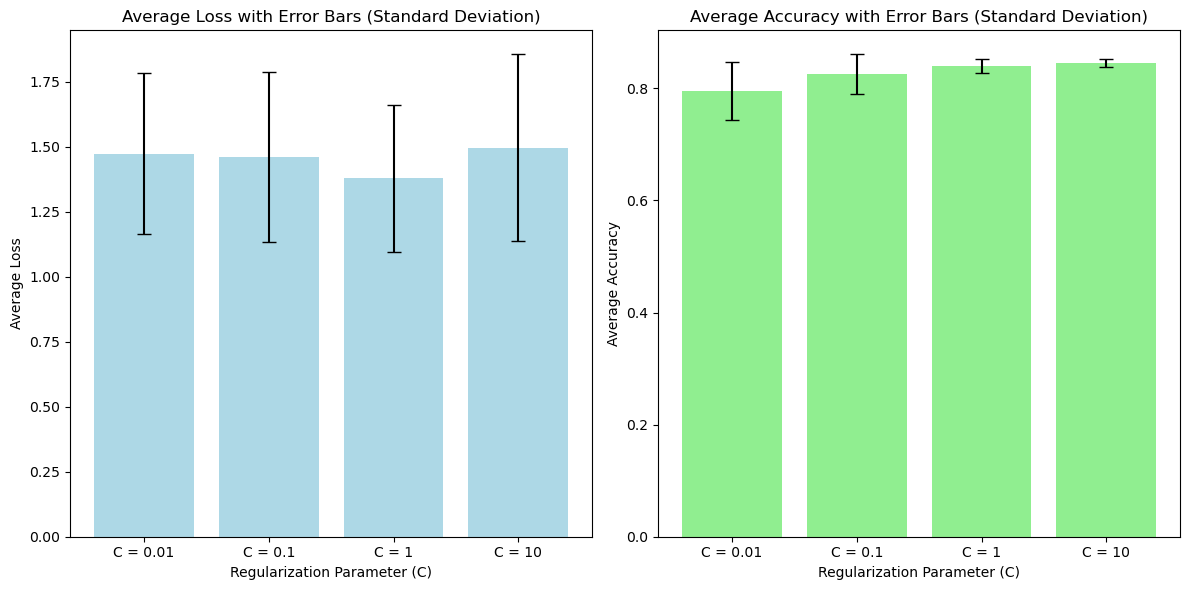

In [54]:
# Regularization parameters (C values)
regularization_params = [0.01, 0.1, 1, 10]

# Calculate mean and standard deviation for losses and accuracies
means_losses = []
std_losses = []
means_accuracies = []
std_accuracies = []

for reg_param in regularization_params:
    fold_losses = results[reg_param]['fold_losses']
    fold_accuracies = results[reg_param]['fold_accuracies']
    
    # Mean and standard deviation for losses
    means_losses.append(np.mean(fold_losses))
    std_losses.append(np.std(fold_losses, ddof=1))  # Sample std (ddof=1)
    
    # Mean and standard deviation for accuracies
    means_accuracies.append(np.mean(fold_accuracies))
    std_accuracies.append(np.std(fold_accuracies, ddof=1))  # Sample std (ddof=1)

# Create positions for bars to ensure even spacing
positions = np.arange(len(regularization_params))

# Plot average losses with error bars (standard deviation)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot for losses
ax[0].bar(positions, means_losses, yerr=std_losses, capsize=5, color='lightblue')
ax[0].set_xlabel("Regularization Parameter (C)")
ax[0].set_ylabel("Average Loss")
ax[0].set_title("Average Loss with Error Bars (Standard Deviation)")
ax[0].set_xticks(positions)
ax[0].set_xticklabels([f"C = {param}" for param in regularization_params])

# Plot for accuracies
ax[1].bar(positions, means_accuracies, yerr=std_accuracies, capsize=5, color='lightgreen')
ax[1].set_xlabel("Regularization Parameter (C)")
ax[1].set_ylabel("Average Accuracy")
ax[1].set_title("Average Accuracy with Error Bars (Standard Deviation)")
ax[1].set_xticks(positions)
ax[1].set_xticklabels([f"C = {param}" for param in regularization_params])

plt.tight_layout()
plt.show()

TypeError: an integer is required (got type builtin_function_or_method)

In [7]:
len(X_train)

75996

In [10]:
indices = torch.randperm(len(X))
len(indices)

1000

In [11]:
def kfold_indices(data, k):
    fold_size = len(data) // k
    indices = np.arange(len(data))
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds

# Define the number of folds (K)
k = 20

# Get the fold indices
fold_indices = kfold_indices(X_train, k)

In [20]:
# Manual K-Fold Cross-Validation Implementation
def manual_kfold_cross_validation(X, y, model_class, criterion, num_epochs=100, lr=0.01, k=5, reg_param=0.01):
    # Shuffle the dataset
    indices = torch.randperm(len(X))
    X = X[indices]
    y = y[indices]

    # Split the data into k approximately equal-sized folds
    fold_size = len(X) // k
    results = {
        'train_loss': [],
        'val_loss': [],
        'val_accuracy': []
    }

    for fold in range(k):
        # Create training and validation sets
        val_start = fold * fold_size
        val_end = (fold + 1) * fold_size if (fold + 1) * fold_size <= len(X) else len(X)

        X_val = X[val_start:val_end]
        y_val = y[val_start:val_end]

        X_train = torch.cat([X[:val_start], X[val_end:]], dim=0)
        y_train = torch.cat([y[:val_start], y[val_end:]], dim=0)

        # Initialize model and optimizer
        model = model_class(n_features, n_classes)
        optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=reg_param)  # Apply regularization via weight decay
        
        fold_train_losses = []
        fold_val_losses = []
        fold_val_accuracies = []
        
        for epoch in range(num_epochs):
            # Train the model
            model.train()
            #print(y_pred)
            print(X_train)
            y_pred = model(X_train)
            train_loss = criterion(y_pred, y_train)
            fold_train_losses.append(train_loss.item())

            # Backward pass and optimize
            train_loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            # Validation after each epoch
            model.eval()
            with torch.no_grad():
                val_preds = model(X_val)
                val_loss = criterion(val_preds, y_val)
                fold_val_losses.append(val_loss.item())

                # Compute accuracy
                _, predicted = torch.max(val_preds, 1)
                accuracy = (predicted == y_val).float().mean().item()
                fold_val_accuracies.append(accuracy)

            # Print loss for every 10 epochs
            if (epoch + 1) % 10 == 0:
                print(f'Fold {fold + 1}/{k}, Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Val Accuracy: {accuracy:.4f}')

        # Store results for this fold
        results['train_loss'].append(fold_train_losses)
        results['val_loss'].append(fold_val_losses)
        results['val_accuracy'].append(fold_val_accuracies)
    
    return results

# Loss function and optimizer
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()

# Perform manual K-Fold Cross-Validation
k = 5  # Number of folds
num_epochs = 100
regularization_param = 0.01  # Regularization strength (weight decay)
results = manual_kfold_cross_validation(X, y, LogisticRegression, criterion, num_epochs=num_epochs, k=k, reg_param=regularization_param)

# Plot loss and accuracy over epochs for each fold
def plot_results(results, metric_name='train_loss'):
    for fold_idx in range(len(results[metric_name])):
        epochs = range(len(results[metric_name][fold_idx]))
        plt.plot(epochs, results[metric_name][fold_idx], label=f'Fold {fold_idx + 1}')
    plt.xlabel("Epochs")
    plt.ylabel(metric_name.replace("_", " ").title())
    plt.title(f'{metric_name.replace("_", " ").title()} for Each Fold')
    plt.legend()
    plt.show()

# Plot training loss, validation loss, and validation accuracy
plot_results(results, 'train_loss')
plot_results(results, 'val_loss')
plot_results(results, 'val_accuracy')

tensor([[ 1.4617,  0.4376, -1.4875,  ...,  1.4515,  0.3833,  1.0246],
        [-2.3630,  1.0171,  0.1623,  ..., -0.9983, -0.2190, -0.8925],
        [ 0.2946, -0.2728,  0.1328,  ..., -1.9842, -0.4504,  0.3503],
        ...,
        [ 0.8952,  0.0673, -0.0111,  ...,  0.8882,  0.1557,  0.6662],
        [-0.5168, -0.8922,  0.3206,  ..., -0.2811,  1.0227,  1.0216],
        [ 0.0457,  0.2504,  0.5798,  ...,  1.5859,  0.2405,  0.4157]])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (800x10 and 16x16)